# Tratamento dos dados

In [77]:
import pandas as pd

file_path = r'.\dataset _original _rodada _1 _(vinho _branco) _FieldSpec.xlsx'
#file_path = r'C:\Users\lenau\Documents\GitHub\field_spec_data_tests\dataset_original_rodada_1_(vinho_branco)_FieldSpec.xlsx'

#importando o arquivo e guardando na variável file_path

fs_df = pd.read_excel(file_path)
#o pandas como pd lê o arquivo em file_path e guarda na variavel fs_df

#fs_df mostra o arquivo completo

fs_df.tail()

,Wavelength,Date,Tank,TA,AV,AT,pH,MV,AR,350,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
37,amostra_00038.asd.txt,2022-11-09,110,11.5,0.27,5.10,3.8,995,1.8,1.503835,...,2.656636,2.550109,2.501081,2.471406,2.529202,2.619732,2.639313,2.598884,2.575628,2.642086
38,amostra_00039.asd.txt,2022-11-09,110,11.5,0.27,5.10,3.8,995,1.8,1.664785,...,2.797181,2.758138,3.052151,3.213511,3.071573,3.178512,3.150150,3.103570,3.097533,3.154010
39,amostra_00040.asd.txt,2022-11-09,110,11.5,0.29,5.17,3.8,995,1.8,1.863774,...,3.127336,2.887030,2.822618,2.870859,2.779617,2.837596,2.990740,2.869202,2.732040,2.635091
40,amostra_00041.asd.txt,2022-11-09,110,11.5,0.29,5.17,3.8,995,1.8,1.670042,...,2.718212,2.633415,2.549066,2.544755,2.590426,2.767958,3.169085,3.571220,3.605718,4.104746
41,amostra_00042.asd.txt,2022-11-09,110,11.5,0.27,5.10,3.8,995,1.8,1.695179,...,2.745712,2.794190,2.618852,2.728730,2.796776,2.743646,3.205304,3.058834,2.688029,2.637008


In [78]:
import pandas as pd
import numpy as np
# Supondo que fs_df já esteja definido
# params contém as colunas específicas que queremos
params = ['TA', 'AV', 'AT', 'pH', 'MV', 'AR']
# Seleciona as colunas especificadas em params e remove linhas com valores NaN
fs_params = fs_df[params].dropna()
# Seleciona as colunas de interesse (da coluna 39 até a coluna 2130)
fs_vars = fs_df.iloc[:, 39:2130].columns.to_list()
# Concatena as colunas de params e fs_vars
fs = fs_vars
# Seleciona as colunas especificadas em fs do dataframe fs_df e remove linhas com valores NaN
dados_wl = fs_df[fs].dropna()
# Exibe o dataframe resultante
#print(fs_df_selected)
# Cria um array de comprimentos de onda
wl = np.arange(380, 2471, 1)
# Exibe os comprimentos de onda
print(wl)
#dados_wl
#fs

[ 380  381  382 ... 2468 2469 2470]


# Pré-processamento dos dados


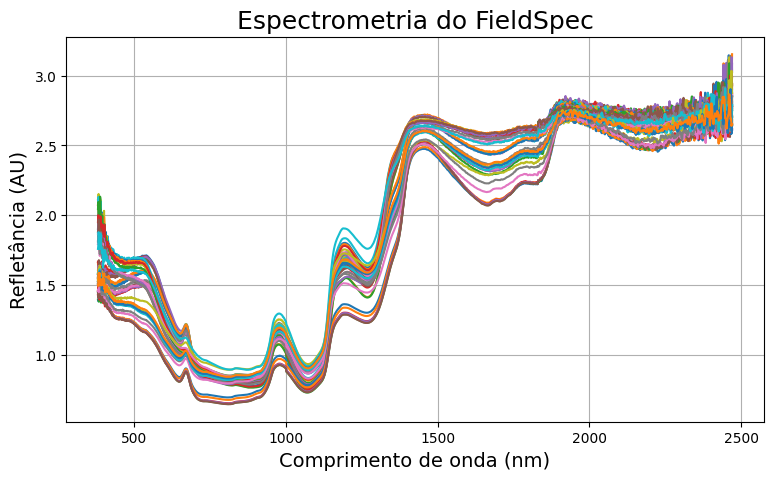

In [79]:
import matplotlib.pyplot as plt
# Define o tamanho da figura como 12x9 polegadas
plt.figure(figsize=(9,5))
# Plota os dados contidos no DataFrame df em relação aos valores do eixo x x_axis_fs
plt.plot(wl, dados_wl.T)
# Define o rótulo do eixo x como "Comprimento de onda (nm)" com tamanho de fonte 14
plt.xlabel("Comprimento de onda (nm)", size=14)
# Define o rótulo do eixo y como "Refletância (AU)" com tamanho de fonte 14
plt.ylabel("Refletância (AU)", size=14)
# Define o título do gráfico como "Espectrometria do FieldSpec" com tamanho de fonte 18
plt.title("Espectrometria do FieldSpec", size=18)
# Ativa a grade no gráfico
plt.grid("on")
# Exibe o gráfico
plt.show()


### Savitzky-Golay

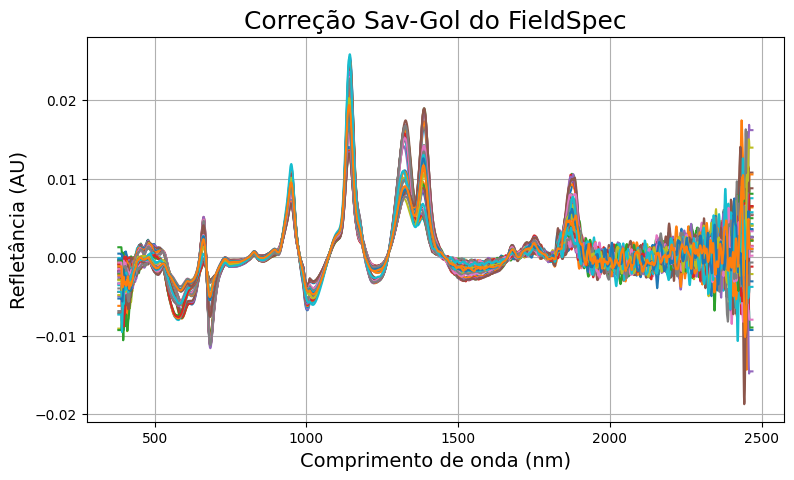

In [80]:
from scipy.signal import savgol_filter
# Aplica a função savgol_filter aos dados x
# para calcular a primeira derivada dos dados
# utilizando uma janela de tamanho 20 e um polinômio de ordem 1
sav_gol = savgol_filter(dados_wl, 21, polyorder=1, deriv=1) 
# Define o tamanho da figura como 12x9 polegadas
plt.figure(figsize=(9,5))
# Plota os dados contidos no DataFrame df em relação aos valores do eixo x x_axis_fs
plt.plot(wl, sav_gol.T)
# Define o rótulo do eixo x como "Comprimento de onda (nm)" com tamanho de fonte 14
plt.xlabel("Comprimento de onda (nm)", size=14)
# Define o rótulo do eixo y como "Refletância (AU)" com tamanho de fonte 14
plt.ylabel("Refletância (AU)", size=14)
# Define o título do gráfico como "Espectrometria do FieldSpec" com tamanho de fonte 18
plt.title("Correção Sav-Gol do FieldSpec", size=18)
# Ativa a grade no gráfico
plt.grid("on")
# Exibe o gráfico
plt.show()


In [81]:
# Criando um DataFrame a partir dos dados
df = pd.DataFrame(sav_gol)
# Nome do arquivo Excel a ser exportado
filename = 'dataset_savgol_ordem_1.xlsx'
# Exportando o DataFrame para um arquivo Excel, excluindo o índice das linhas
df.to_excel(filename, index=False)
# Imprimindo uma mensagem indicando que o conjunto de dados foi exportado com sucesso para o Excel
print("Dataset exported successfully to Excel.")

Dataset exported successfully to Excel.


### MSC

In [82]:
def apply_msc(df):
    """
    Aplica a correção multiplicativa de espalhamento (MSC) aos dados espectroscópicos.
    
    Parâmetros:
    df : pandas.DataFrame
        DataFrame contendo os dados espectroscópicos. As linhas devem ser amostras e as colunas devem ser comprimentos de onda.
    
    Retorna:
    pandas.DataFrame
        DataFrame com os dados corrigidos pelo MSC.
    """
    
    # Calcula o espectro médio de referência
    mean_spectrum = df.mean(axis=0)
    
    # Lista para armazenar os espectros corrigidos
    corrected_spectra = []
    
    # Aplica MSC a cada espectro individualmente
    for i in range(df.shape[0]):
        spectrum = df.iloc[i, :]
        
        # Ajusta uma linha reta ao espectro médio de referência
        slope, intercept = np.polyfit(mean_spectrum, spectrum, 1)
        
        # Corrige o espectro
        corrected_spectrum = (spectrum - intercept) / slope
        corrected_spectra.append(corrected_spectrum)
    
    # Converte a lista de espectros corrigidos de volta para um DataFrame
    corrected_df = pd.DataFrame(corrected_spectra, columns=df.columns)
    
    return corrected_df

dados_wl
df_msc = apply_msc(dados_wl)

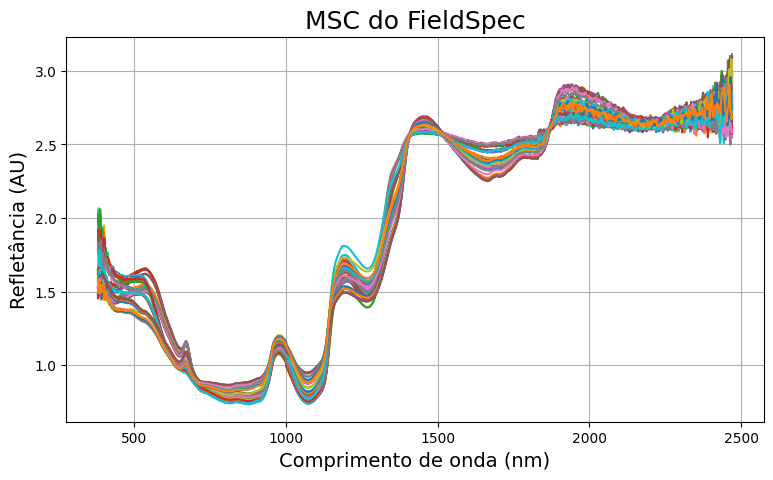

In [83]:
# Define o tamanho da figura como 12x9 polegadas
plt.figure(figsize=(9, 5))
# Plota os dados corrigidos
plt.plot(np.arange(380, 2471), df_msc.T)
# Define o rótulo do eixo x como "Comprimento de onda (nm)" com tamanho de fonte 14
plt.xlabel("Comprimento de onda (nm)", size=14)
# Define o rótulo do eixo y como "Refletância (AU)" com tamanho de fonte 14
plt.ylabel("Refletância (AU)", size=14)
# Define o título do gráfico como "Espectrometria do FieldSpec" com tamanho de fonte 18
plt.title("MSC do FieldSpec", size=18)
# Ativa a grade no gráfico
plt.grid("on")
# Exibe o gráfico
plt.show()

In [84]:
# Criando um DataFrame a partir dos dados
df = pd.DataFrame(df_msc)
# Nome do arquivo Excel a ser exportado
filename = 'dataset_msc.xlsx'
# Exportando o DataFrame para um arquivo Excel, excluindo o índice das linhas
df.to_excel(filename, index=False)
# Imprimindo uma mensagem indicando que o conjunto de dados foi exportado com sucesso para o Excel
print("Dataset exported successfully to Excel.")

Dataset exported successfully to Excel.


### SNV

In [85]:
#dados_wl

In [86]:
import numpy as np
import pandas as pd

def snv(input_data):
    """
    Aplica a transformação Standard Normal Variate (SNV) aos dados de entrada.
    
    Parameters:
    input_data (numpy.ndarray): Dados de entrada, onde cada linha é um espectro.
    
    Returns:
    numpy.ndarray: Dados transformados após a aplicação do SNV.
    """
    # Calcular a média de cada linha
    mean = np.mean(input_data, axis=1, keepdims=True)
    # Calcular o desvio padrão de cada linha
    std_dev = np.std(input_data, axis=1, keepdims=True)
    # Aplicar a transformação SNV
    snv_data = (input_data - mean) / std_dev
    return snv_data

# Exemplo de DataFrame (substitua pelo seu DataFrame real)
dados_wl

# Certifique-se de que os dados são numéricos
if not np.issubdtype(dados_wl.values.dtype, np.number):
    raise ValueError("Todos os dados de entrada devem ser numéricos.")

# Aplicando a transformação SNV ao DataFrame
df_snv = snv(dados_wl.values)
df_snv = pd.DataFrame(df_snv, columns=wl)

#data_snv_fs


In [87]:
# Defina o nome do arquivo onde deseja salvar os dados corrigidos
filename = "dataset_snv.xlsx"

# Salve os dados corrigidos em um novo arquivo Excel
df_snv.to_excel(filename, index=False)

# Exiba uma mensagem indicando que o arquivo foi salvo com sucesso
print(f"Dados corrigidos salvos com sucesso em {filename}")

Dados corrigidos salvos com sucesso em dataset_snv.xlsx


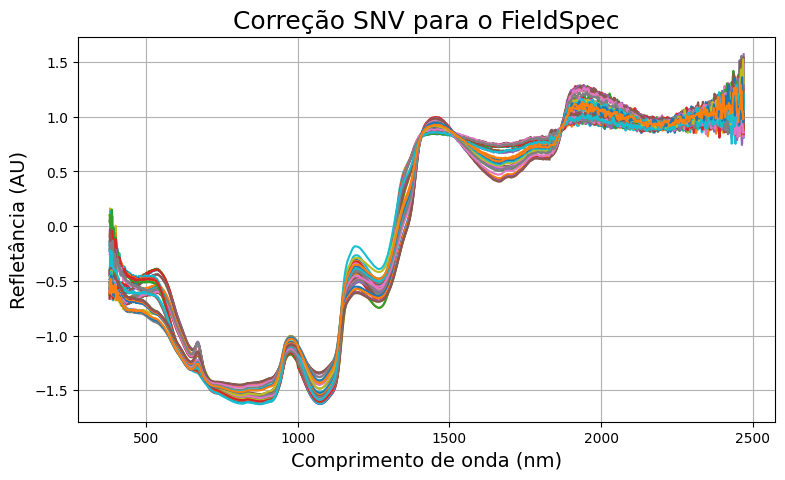

In [88]:
# Cria uma figura para o gráfico com tamanho 12x9 polegadas
plt.figure(figsize=(9, 5))
# Plota os dados corrigidos SNV em relação ao eixo x wl
plt.plot(wl, df_snv.T)
# Define o rótulo do eixo x como "Comprimento de onda (nm)" e o tamanho da fonte como 14
plt.xlabel("Comprimento de onda (nm)", size=14)
# Define o rótulo do eixo y como "Refletância (AU)" e o tamanho da fonte como 14
plt.ylabel("Refletância (AU)", size=14)
# Define o título do gráfico como "Correção SNV para o FieldSpec" e o tamanho da fonte como 18
plt.title("Correção SNV para o FieldSpec", size=18)
# Adiciona uma grade ao gráfico
plt.grid("on")
# Exibe o gráfico
plt.show()

# Divisão de dados

In [89]:
# Lista de conjuntos de dados espectrais (X) e atributos de qualidade (Y) para cada dispositivo
Y = fs_df[['TA', 'AV', 'AT', 'pH', 'MV', 'AR']]
X = dados_wl

# Aplicação dos modelos

In [90]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')  # Ignora os avisos durante a execução

# Lista de métodos de pré-processamento a serem aplicados
pre_p = ["MSC", "RAW", "SNV", "Savitzky-Golay"]

# DataFrame para armazenar os resultados
results_raw = pd.DataFrame(columns=['Dispositivo', 'Parâmetro', 'Modelo', 'Pré-processamento', 'R² Calibração', 'R² Validação', 'RMSE Calibração', 'RMSE Validação'])
columns_r = results_raw.columns.to_list()

results_msc = pd.DataFrame(columns=['Dispositivo', 'Parâmetro', 'Modelo', 'Pré-processamento', 'R² Calibração', 'R² Validação', 'RMSE Calibração', 'RMSE Validação'])
columns_m = results_msc.columns.to_list()

results_snv = pd.DataFrame(columns=['Dispositivo', 'Parâmetro', 'Modelo', 'Pré-processamento', 'R² Calibração', 'R² Validação', 'RMSE Calibração', 'RMSE Validação'])
columns_s = results_snv.columns.to_list()

results_savgol = pd.DataFrame(columns=['Dispositivo', 'Parâmetro', 'Modelo', 'Pré-processamento', 'R² Calibração', 'R² Validação', 'RMSE Calibração', 'RMSE Validação'])
columns_sg = results_savgol.columns.to_list()

# Lista de dispositivos
device = ["FieldSpec"]

# Índices para os parâmetros de qualidade
index_pr = [0, 1, 2, 3, 4, 5]

# Nomes dos parâmetros de qualidade
index_pr_name = ["TA", "AV", "AT", "pH", "MV", "AR"]

# Contadores
t = 0
counter = 0

In [93]:
# Aplica o MSC nos dados
x_p = df_msc

# Divide os dados em conjunto de treinamento e teste
x_tr, x_te, y_tr, y_te = train_test_split(x_p, Y, test_size=0.3, random_state=0)

# Modelagem com PLSR
pls = PLSRegression(n_components=6)
pls.fit(x_tr, y_tr)
y_pred_pls = pls.predict(x_te)
y_cal_pls = pls.predict(x_tr)

# Resultados PLS
pls_results = []
for j in index_pr:
    r2_cal = r2_score(y_tr[:, j], y_cal_pls[:, j])
    r2_pred = r2_score(y_te[:, j], y_pred_pls[:, j])
    rmse_cal = np.sqrt(mean_squared_error(y_tr[:, j], y_cal_pls[:, j]))
    rmse_pred = np.sqrt(mean_squared_error(y_te[:, j], y_pred_pls[:, j]))
    
    result_pls = [device[0], index_pr_name[j], "PLS", "MSC", f"{r2_cal:.4f}", f"{r2_pred:.4f}", f"{rmse_cal:.4f}", f"{rmse_pred:.4f}"]
    
    # Adiciona os resultados à lista temporária
    pls_results.append(result_pls)

# Converte a lista temporária em um DataFrame
pls_df = pd.DataFrame(pls_results, columns=columns_m)

# Concatena o DataFrame temporário aos resultados
results_msc = pd.concat([results_msc, pls_df], ignore_index=True)

print(1)

# Modelagem com RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_tr, y_tr)
y_pred_rf = rf.predict(x_te)
y_cal_rf = rf.predict(x_tr)

# Resultados RandomForestRegressor
rf_results = []
for j in index_pr:
    r2_cal = r2_score(y_tr[:, j], y_cal_rf[:, j])
    r2_pred = r2_score(y_te[:, j], y_pred_rf[:, j])
    rmse_cal = np.sqrt(mean_squared_error(y_tr[:, j], y_cal_rf[:, j]))
    rmse_pred = np.sqrt(mean_squared_error(y_te[:, j], y_pred_rf[:, j]))

    # Cria uma lista com os resultados
    result_rf = [device[0], index_pr_name[j], "RF", "MSC", f"{r2_cal:.4f}", f"{r2_pred:.4f}", f"{rmse_cal:.4f}", f"{rmse_pred:.4f}"]
    
    # Adiciona os resultados à lista temporária
    rf_results.append(result_rf)

# Converte a lista temporária em um DataFrame
rf_df = pd.DataFrame(rf_results, columns=columns_m)

# Concatena o DataFrame temporário aos resultados
results_msc = pd.concat([results_msc, rf_df], ignore_index=True)

print(2)

# Modelagem com MLPRegressor
mlpr = MLPRegressor(max_iter=500, solver="adam", learning_rate_init=0.01)
mlpr.fit(x_tr, y_tr)
y_pred_mlpr = mlpr.predict(x_te)
y_cal_mlpr = mlpr.predict(x_tr)

# Resultados MLPRegressor
mlpr_results = []
for j in index_pr:
    r2_cal = r2_score(y_tr[:, j], y_cal_mlpr[:, j])
    r2_pred = r2_score(y_te[:, j], y_pred_mlpr[:, j])
    rmse_cal = np.sqrt(mean_squared_error(y_tr[:, j], y_cal_mlpr[:, j]))
    rmse_pred = np.sqrt(mean_squared_error(y_te[:, j], y_pred_mlpr[:, j]))

    # Cria uma lista com os resultados
    result_mlpr = [device[0], index_pr_name[j], "MLPR", "MSC", f"{r2_cal:.4f}", f"{r2_pred:.4f}", f"{rmse_cal:.4f}", f"{rmse_pred:.4f}"]
    
    # Adiciona os resultados à lista temporária
    mlpr_results.append(result_mlpr)

# Converte a lista temporária em um DataFrame
mlpr_df = pd.DataFrame(mlpr_results, columns=columns_m)

# Concatena o DataFrame temporário aos resultados
results_msc = pd.concat([results_msc, mlpr_df], ignore_index=True)

print(3)


InvalidIndexError: (slice(None, None, None), 0)

In [ ]:
results_msc

,Dispositivo,Parâmetro,Modelo,Pré-processamento,R² Calibração,R² Validação,RMSE Calibração,RMSE Validação
0,FieldSpec,TA,PLS,MSC,0.9580,0.5715,0.2050,0.5046
1,FieldSpec,AV,PLS,MSC,0.9734,0.7573,0.1632,0.4627
2,FieldSpec,AT,PLS,MSC,0.8424,0.4417,0.3970,0.6480
3,FieldSpec,pH,PLS,MSC,0.9714,-13525078574162391600355474407424.0000,0.1690,0.4083
4,FieldSpec,MV,PLS,MSC,0.9848,0.8727,0.1233,0.3230
5,FieldSpec,AR,PLS,MSC,0.9878,0.8764,0.1105,0.3130
6,FieldSpec,TA,RF,MSC,0.9837,0.7021,0.1277,0.4207
7,FieldSpec,AV,RF,MSC,0.9941,0.9306,0.0771,0.2474
8,FieldSpec,AT,RF,MSC,0.9586,0.8096,0.2036,0.3784
9,FieldSpec,pH,RF,MSC,0.9462,-10308818413879209682579815923712.0000,0.2319,0.3565
